In [1]:
# Import dependancies
import imageio
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import os
from os import path
from selenium import webdriver
from PIL import Image
from pathlib import Path
print(os.getcwd())

/Users/rogerwatts/Desktop/Classwork/FAO-Fertilizer-Data-Analysis


In [2]:
fert_df = pd.read_csv("Inputs_FertilizersNutrient_E_All_Data.csv")
fert_df

,Area Code,Area,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
0,2,Afghanistan,3102,Nutrient nitrogen N (total),5510,Production,1974,1974,tonnes,19117.00,Qm
1,2,Afghanistan,3102,Nutrient nitrogen N (total),5510,Production,1975,1975,tonnes,14774.00,Qm
2,2,Afghanistan,3102,Nutrient nitrogen N (total),5510,Production,1976,1976,tonnes,26203.00,Qm
3,2,Afghanistan,3102,Nutrient nitrogen N (total),5510,Production,1977,1977,tonnes,37689.00,Qm
4,2,Afghanistan,3102,Nutrient nitrogen N (total),5510,Production,1978,1978,tonnes,48300.00,Qm
...,...,...,...,...,...,...,...,...,...,...,...
97199,5817,Net Food Importing Developing Countries,3104,Nutrient potash K2O (total),5157,Agricultural Use,2015,2015,tonnes,1327349.45,A
97200,5817,Net Food Importing Developing Countries,3104,Nutrient potash K2O (total),5157,Agricultural Use,2016,2016,tonnes,1279317.58,A
97201,5817,Net Food Importing Developing Countries,3104,Nutrient potash K2O (total),5157,Agricultural Use,2017,2017,tonnes,1478173.59,A
97202,5817,Net Food Importing Developing Countries,3104,Nutrient potash K2O (total),5157,Agricultural Use,2018,2018,tonnes,1618023.97,A


In [17]:
fert_df['Area'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belgium-Luxembourg', 'Belize',
       'Benin', 'Bermuda', 'Bhutan', 'Bolivia (Plurinational State of)',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chile', 'China', 'China, mainland', 'China, Taiwan Province of',
       'Colombia', 'Congo', 'Cook Islands', 'Costa Rica', "C�te d'Ivoire",
       'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Czechoslovakia',
       'Democratic Republic of the Congo', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea',
       'Estonia', 'Ethiopia', 'Ethiopia PDR', 'Fiji', 'Finland', 'France',
       'French Polynesia', 'Gabon', 'Gambia',

In [14]:
fert_df['Value'].mean()


1009166.1789801847

In [18]:
fert_df.nunique()

Area Code         209
Area              209
Item Code           3
Item                3
Element Code        4
Element             4
Year Code          59
Year               59
Unit                1
Value           57105
Flag               12
dtype: int64

In [19]:
# set the filepath and load in a shapefile
fp = os.path.join("World_Countries", "World_Countries.shp")
map_df = gpd.read_file(fp)
# check data type so we can see that this is not a normal dataframe, but a GEOdataframe
map_df.head()

,FID,COUNTRY,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry
0,1,American Samoa,AS,United States,US,0.600124,0.013720,"POLYGON ((-170.74390 -14.37555, -170.74942 -14..."
1,2,United States Minor Outlying Islands,UM,United States,US,0.480216,0.003216,"MULTIPOLYGON (((-160.02114 -0.39805, -160.0281..."
2,3,Cook Islands,CK,New Zealand,NZ,0.980664,0.013073,"MULTIPOLYGON (((-159.74698 -21.25667, -159.793..."
3,4,French Polynesia,PF,France,FR,3.930211,0.175332,"MULTIPOLYGON (((-149.17920 -17.87084, -149.258..."
4,5,Niue,NU,New Zealand,NZ,0.541413,0.021414,"POLYGON ((-169.89389 -19.14556, -169.93088 -19..."


<AxesSubplot:>

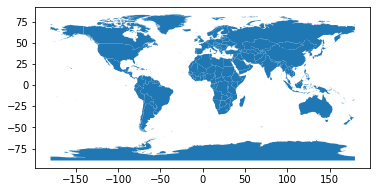

In [5]:
map_df.plot()

In [20]:
map_df["COUNTRY"].unique()

array(['American Samoa', 'United States Minor Outlying Islands',
       'Cook Islands', 'French Polynesia', 'Niue', 'Pitcairn', 'Samoa',
       'Tokelau', 'Tonga', 'Wallis and Futuna', 'El Salvador',
       'Guatemala', 'Mexico', 'Canada', 'Argentina', 'Falkland Islands',
       'Chile', 'Ecuador', 'Peru', 'Bolivia', 'Brazil', 'Paraguay',
       'Uruguay', 'South Georgia and South Sandwich Islands',
       'Antarctica', 'Fiji', 'Saint Helena', 'Anguilla',
       'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Barbados', 'Belize',
       'Bermuda', 'Bonaire', 'British Virgin Islands', 'Cayman Islands',
       'Colombia', 'Costa Rica', 'Cuba', 'Curacao', 'Dominica',
       'Dominican Republic', 'French Guiana', 'Grenada', 'Guadeloupe',
       'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Martinique',
       'Montserrat', 'Nicaragua', 'Panama', 'Puerto Rico', 'Saba',
       'Saint Barthelemy', 'Saint Eustatius', 'Saint Kitts and Nevis',
       'Saint Lucia', 'Saint Martin', 'Saint Pierre and Miq

In [22]:
fert_df['Area'].isin(map_df['COUNTRY']).value_counts()

True     66513
False    30691
Name: Area, dtype: int64

In [23]:
map_df['COUNTRY'].isin(fert_df['Area']).value_counts()

True     153
False     96
Name: COUNTRY, dtype: int64

In [24]:
fert_df['Area'] = fert_df['Area'].str.replace('United States of America', 'United States')
fert_df['Area'] = fert_df['Area'].str.replace('USSR', 'Russian Federation')

In [25]:
# join the geodataframe with the cleaned up csv dataframe
merged = map_df.set_index("COUNTRY").join(fert_df.set_index("Area"))
merged.head()

,FID,ISO,COUNTRYAFF,AFF_ISO,SHAPE_Leng,SHAPE_Area,geometry,Area Code,Item Code,Item,Element Code,Element,Year Code,Year,Unit,Value,Flag
Afghanistan,192,AF,Afghanistan,AF,50.80321,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",2.0,3102.0,Nutrient nitrogen N (total),5510.0,Production,1974.0,1974.0,tonnes,19117.0,Qm
Afghanistan,192,AF,Afghanistan,AF,50.80321,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",2.0,3102.0,Nutrient nitrogen N (total),5510.0,Production,1975.0,1975.0,tonnes,14774.0,Qm
Afghanistan,192,AF,Afghanistan,AF,50.80321,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",2.0,3102.0,Nutrient nitrogen N (total),5510.0,Production,1976.0,1976.0,tonnes,26203.0,Qm
Afghanistan,192,AF,Afghanistan,AF,50.80321,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",2.0,3102.0,Nutrient nitrogen N (total),5510.0,Production,1977.0,1977.0,tonnes,37689.0,Qm
Afghanistan,192,AF,Afghanistan,AF,50.80321,62.566714,"POLYGON ((61.27655 35.60725, 61.29638 35.62854...",2.0,3102.0,Nutrient nitrogen N (total),5510.0,Production,1978.0,1978.0,tonnes,48300.0,Qm


In [26]:
# Get a list of years for data loops
from datetime import date

start = date(1974, 1, 1) 
end = date(2019, 1, 1)

year_range = [year for year in range(start.year, end.year +1)]
print(year_range)

[1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]


In [32]:
# set the min and max range for the choropleth map
vmin, vmax = 0, 2000000

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/geopandas/plotting.py:661: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=figsize)


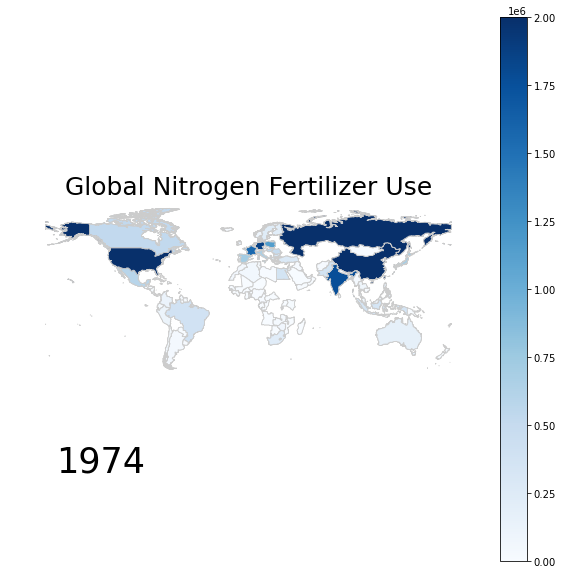

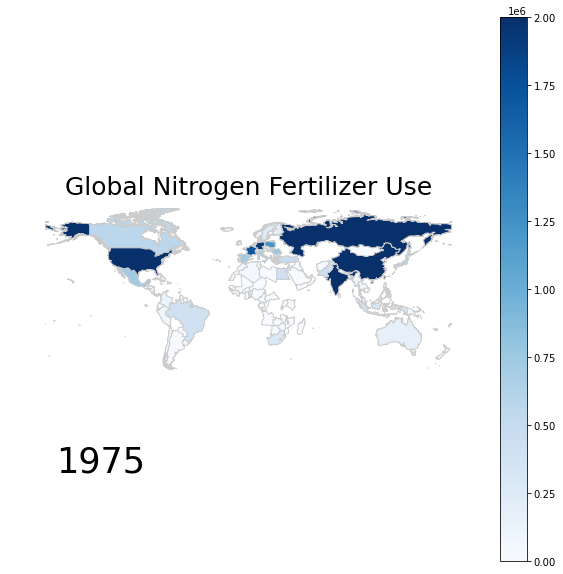

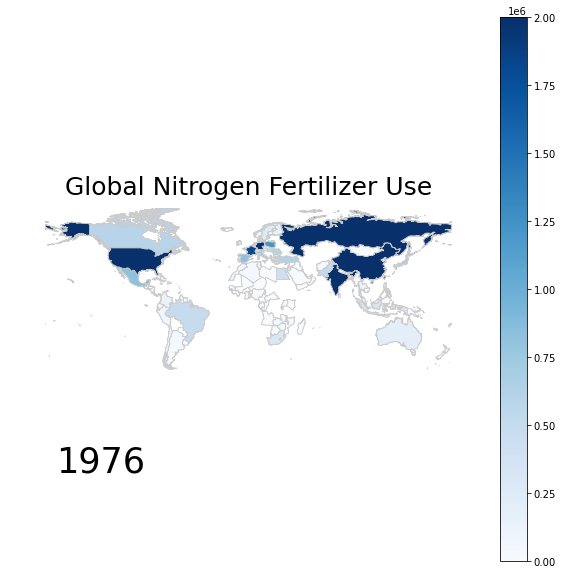

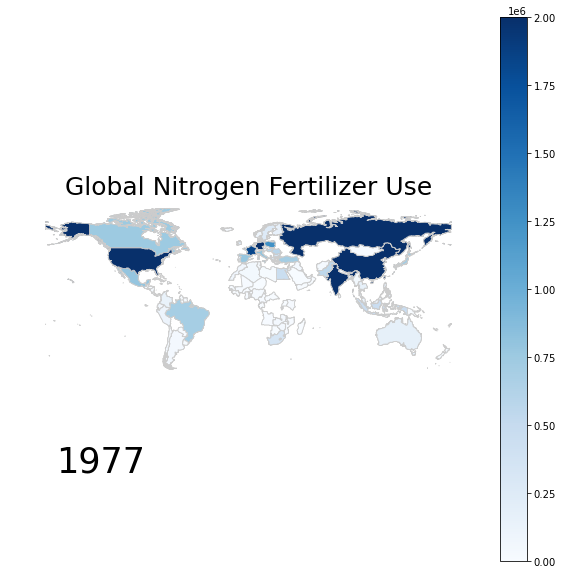

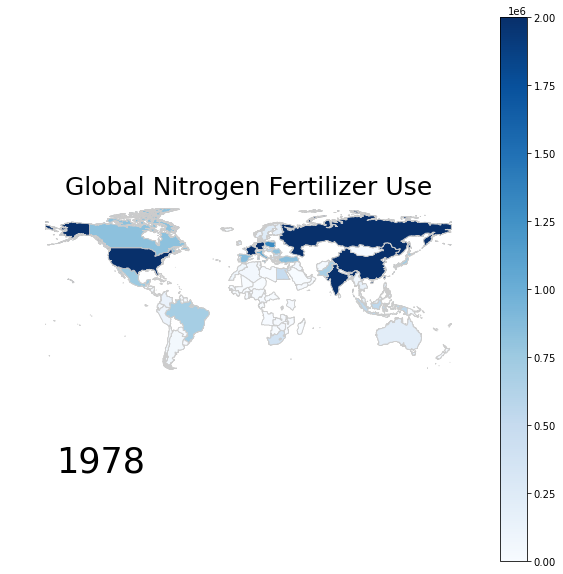

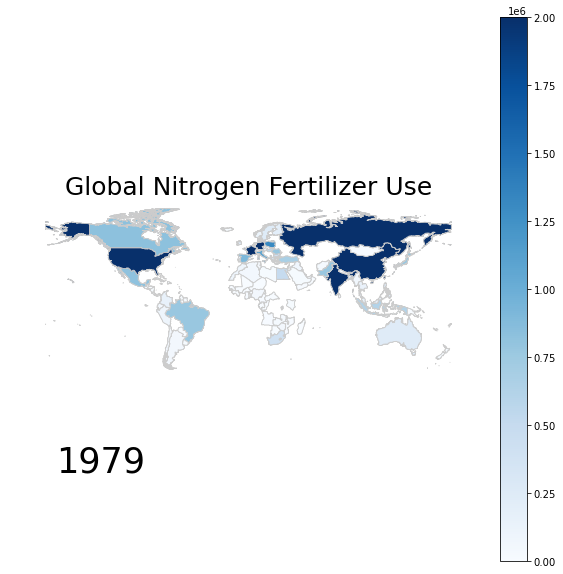

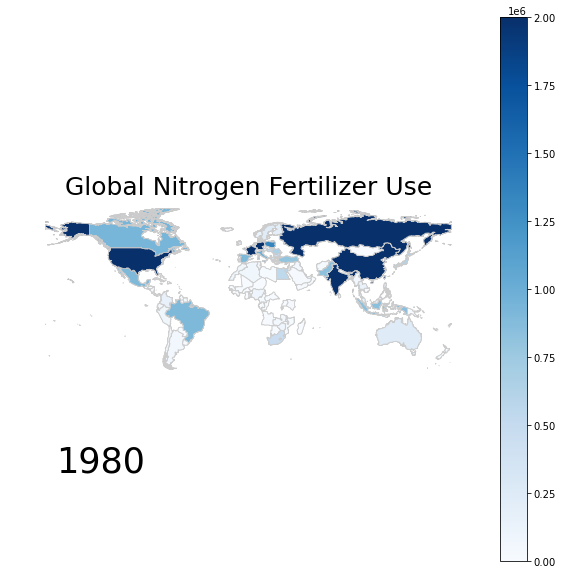

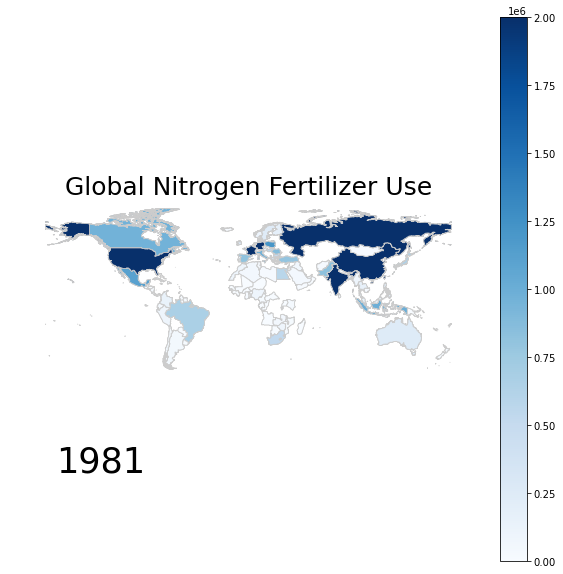

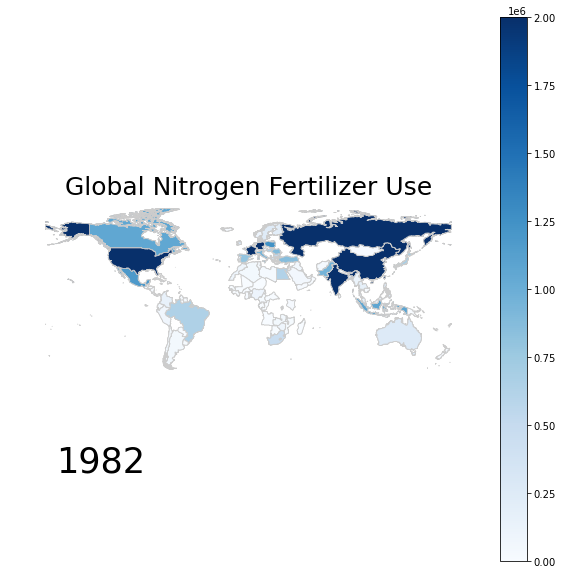

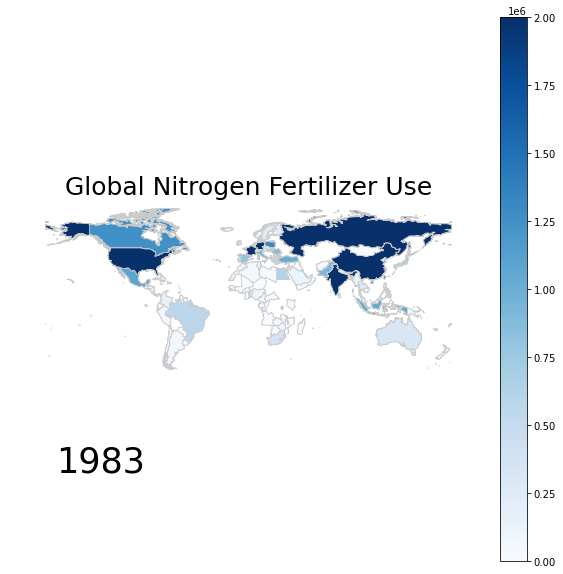

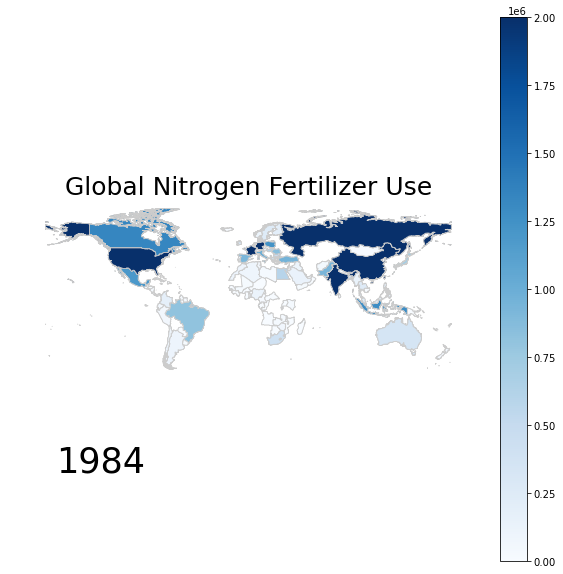

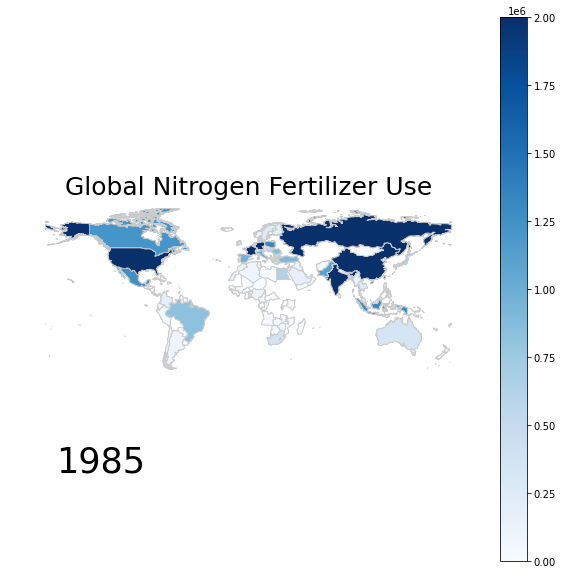

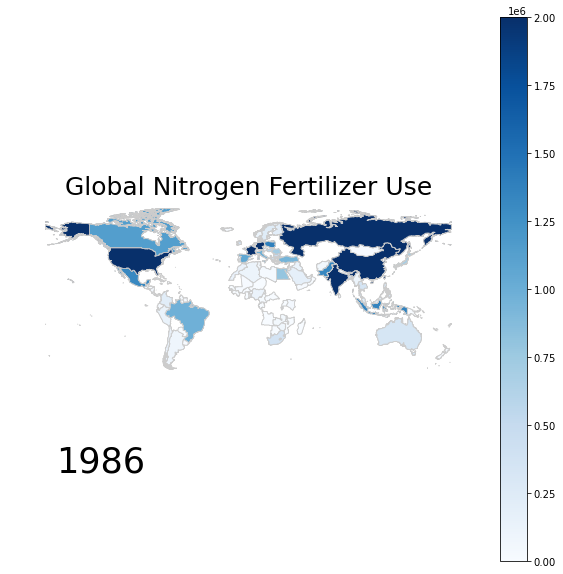

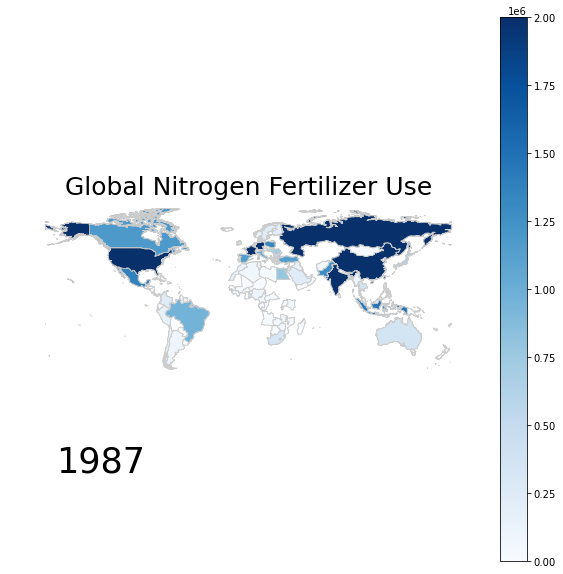

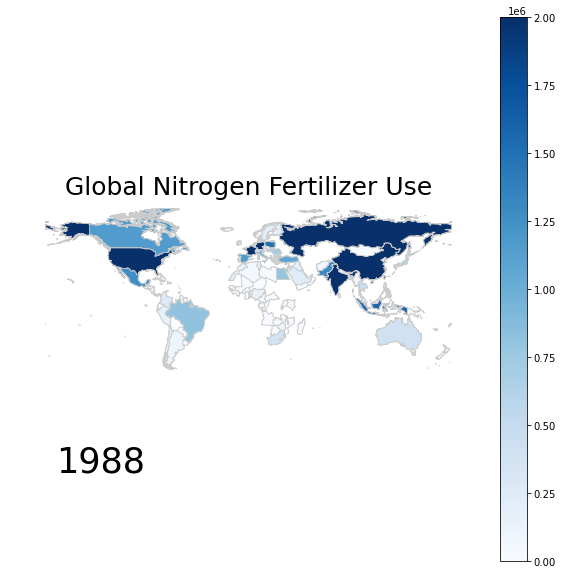

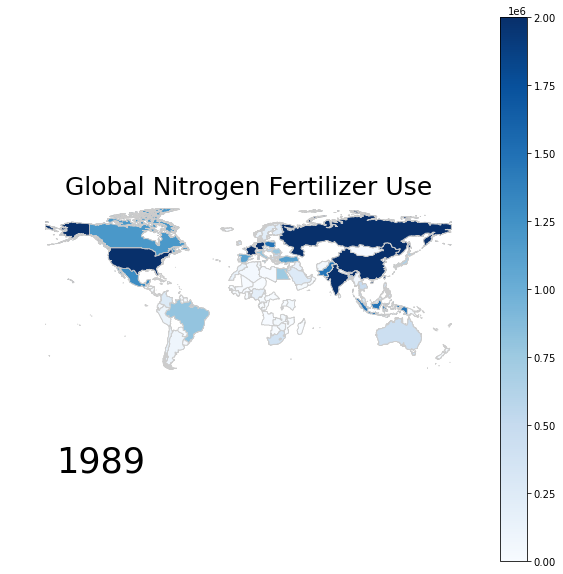

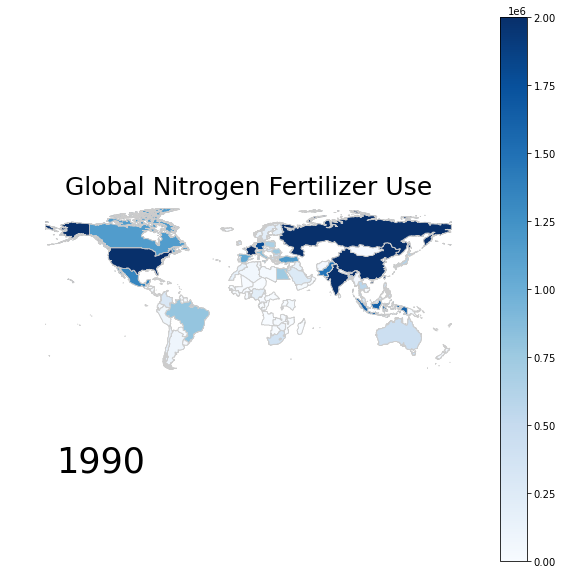

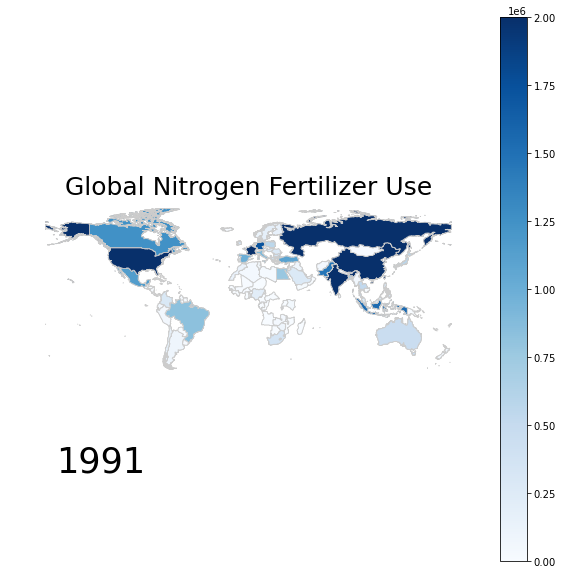

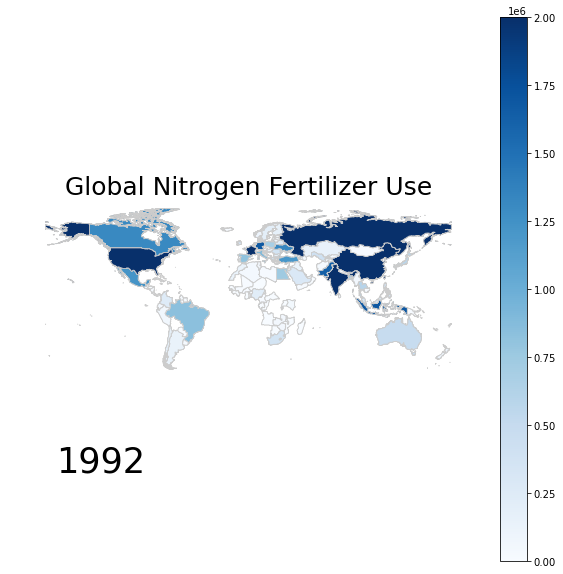

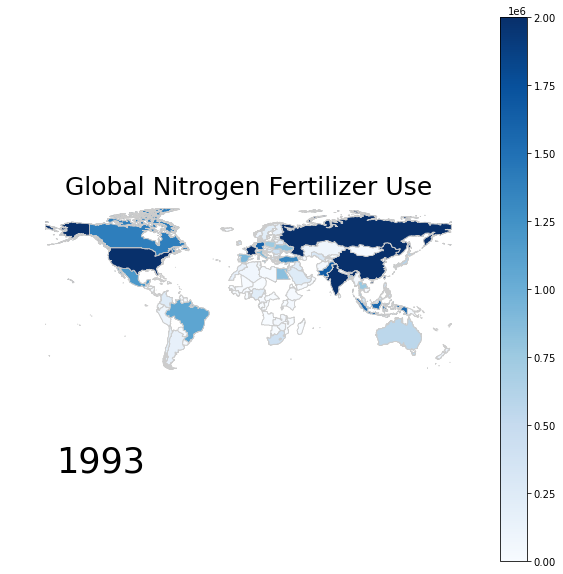

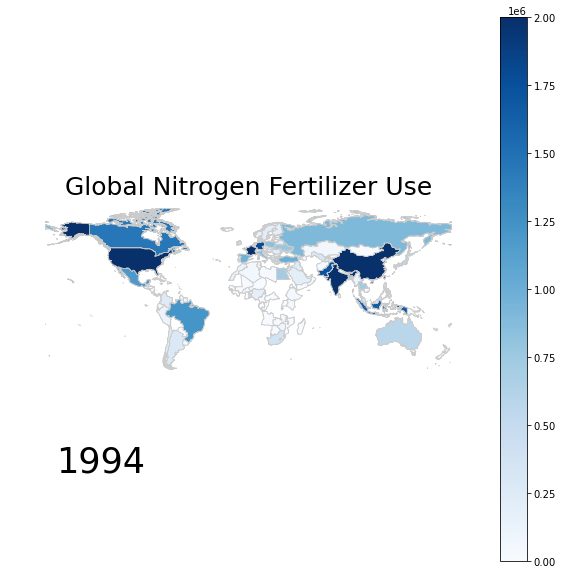

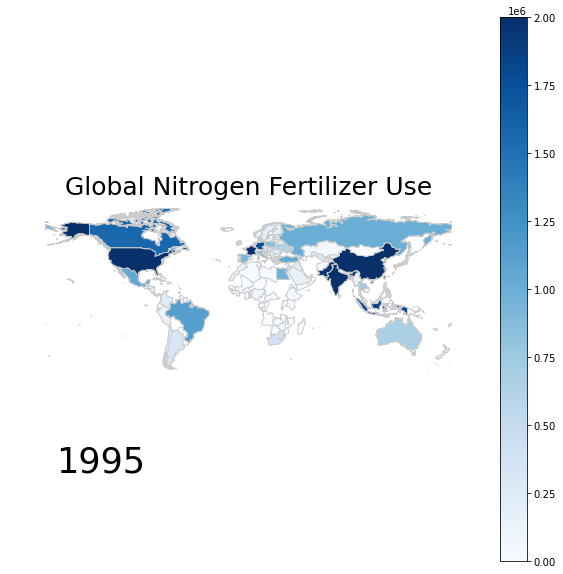

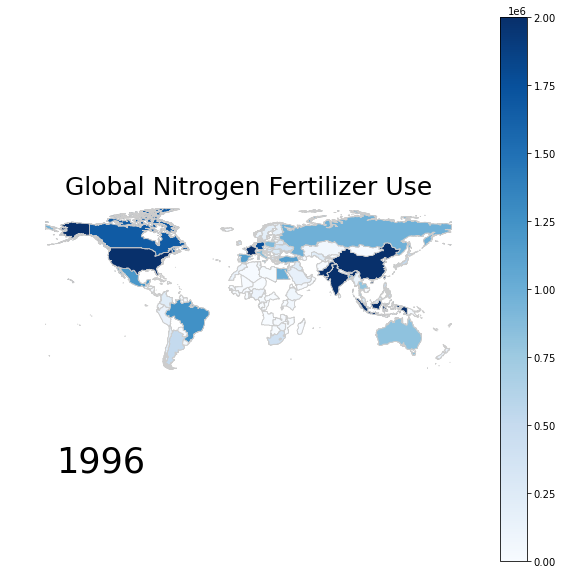

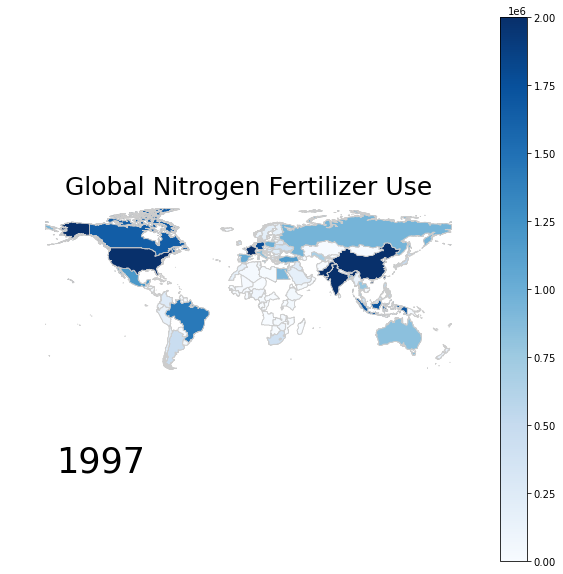

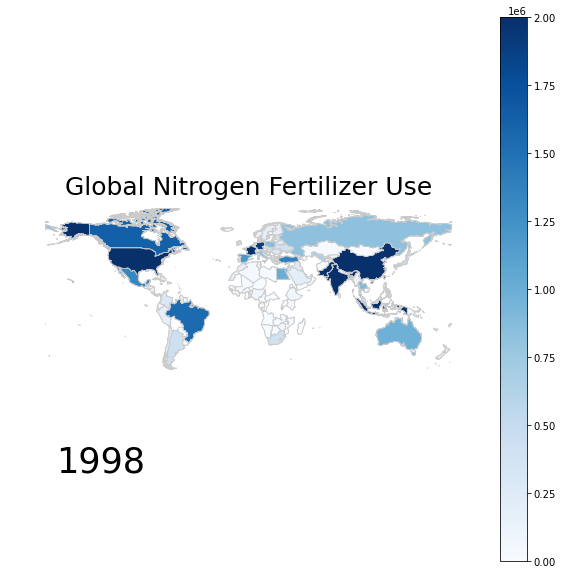

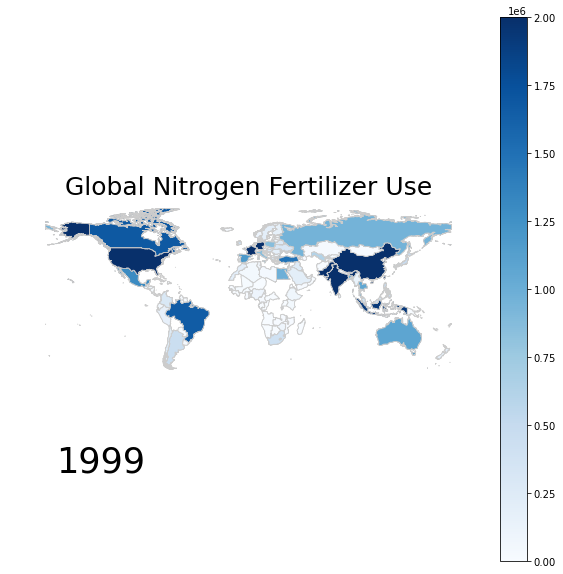

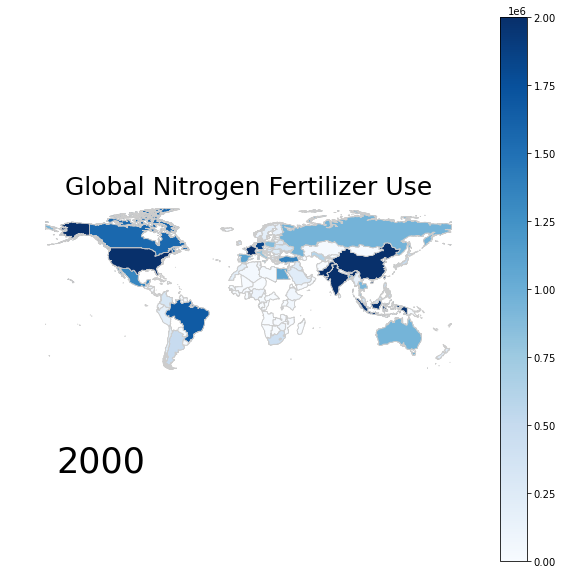

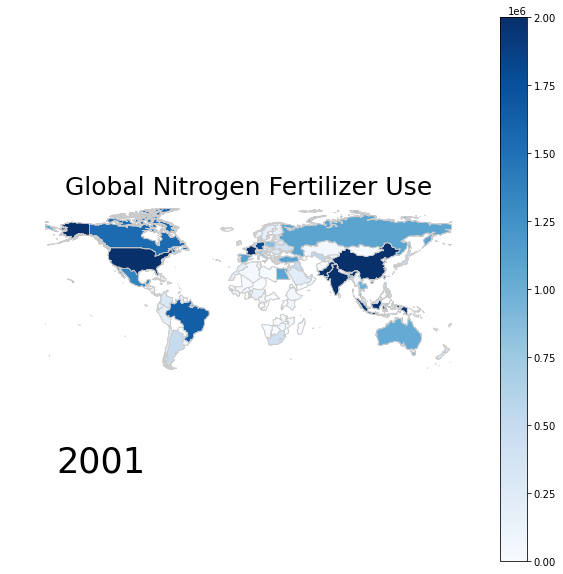

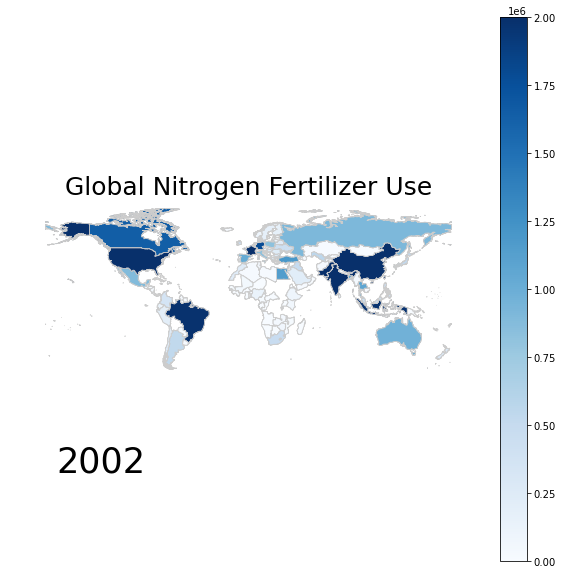

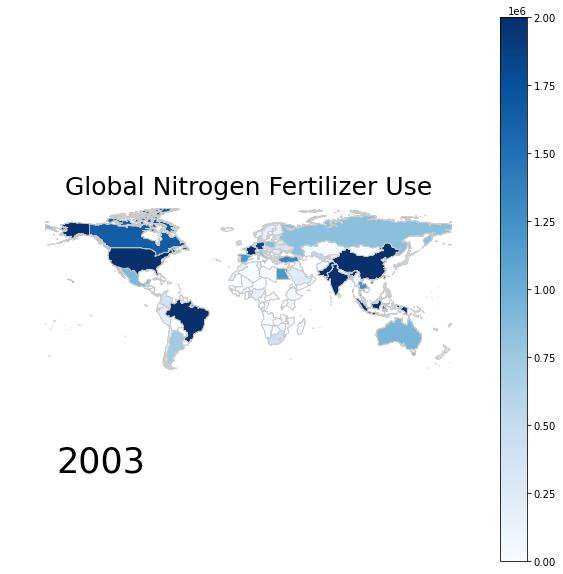

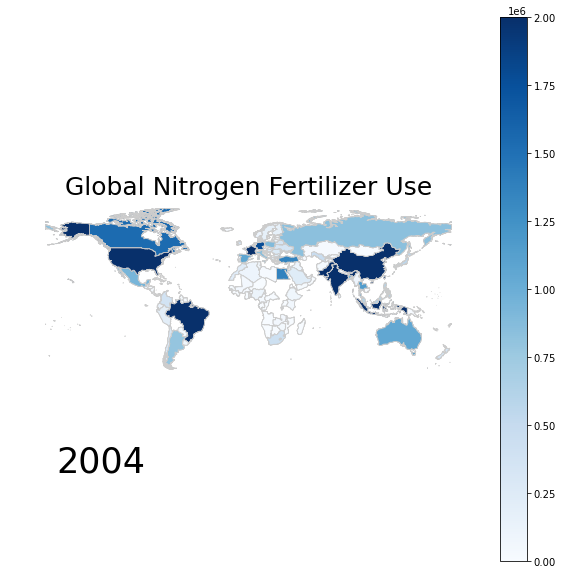

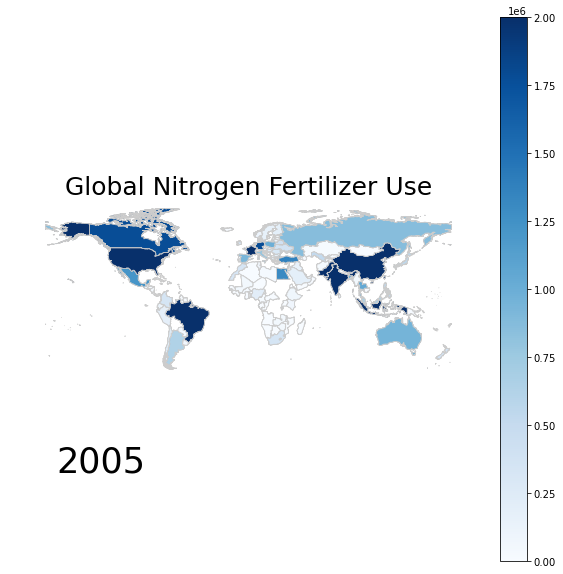

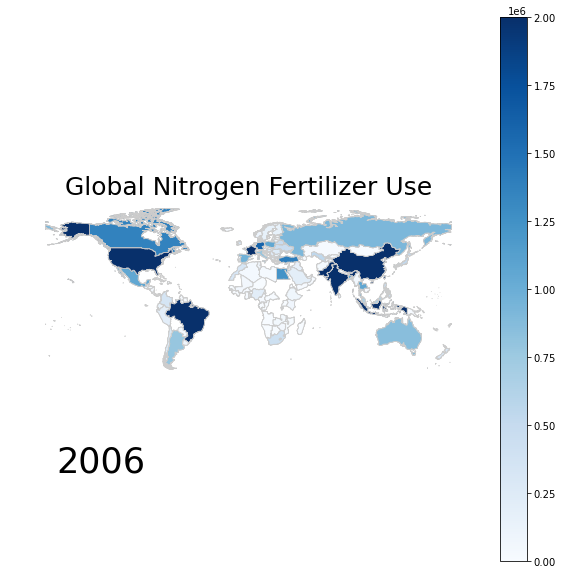

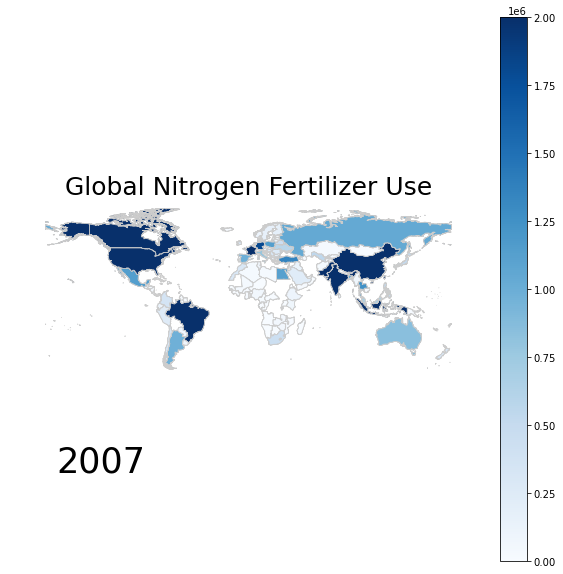

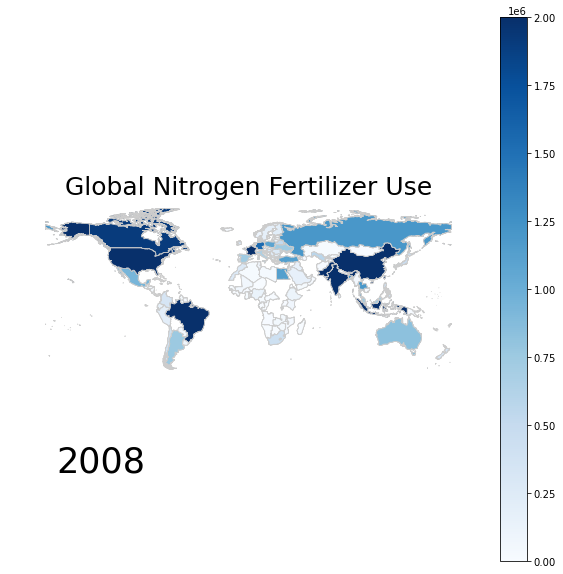

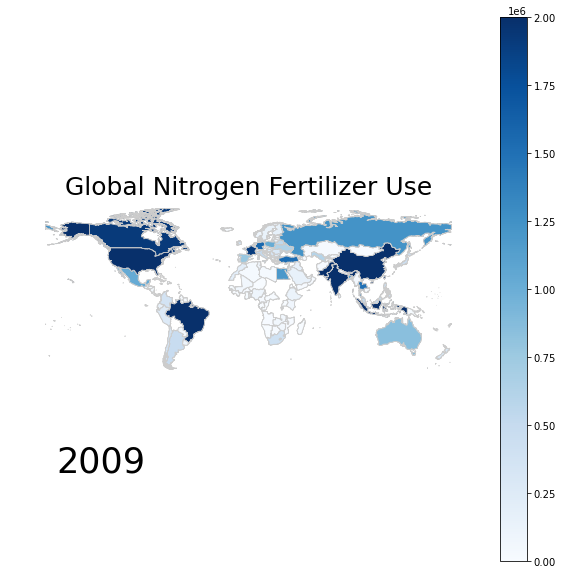

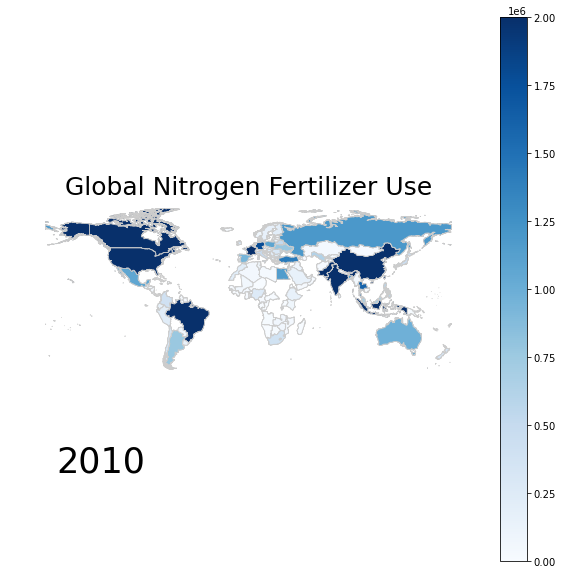

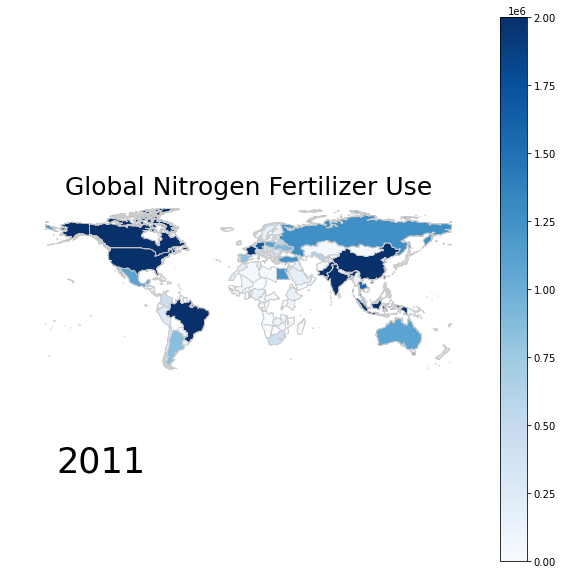

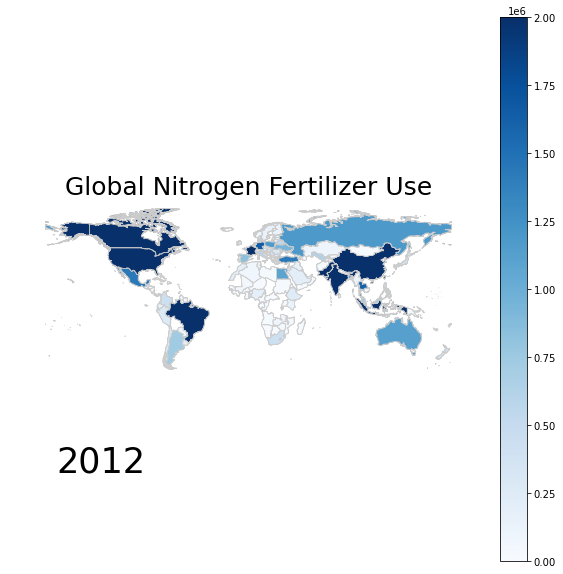

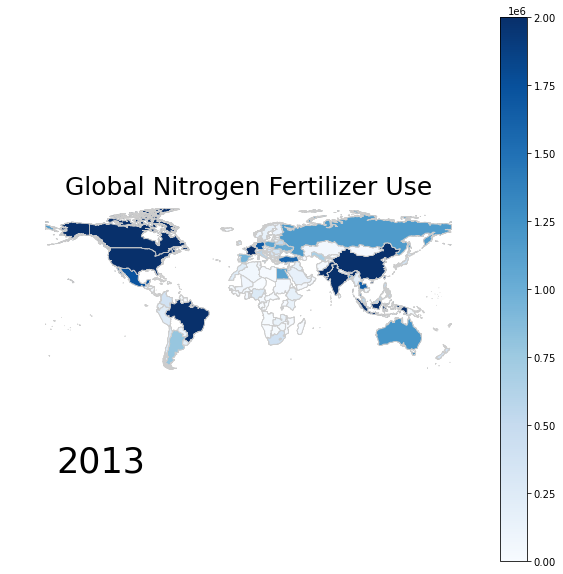

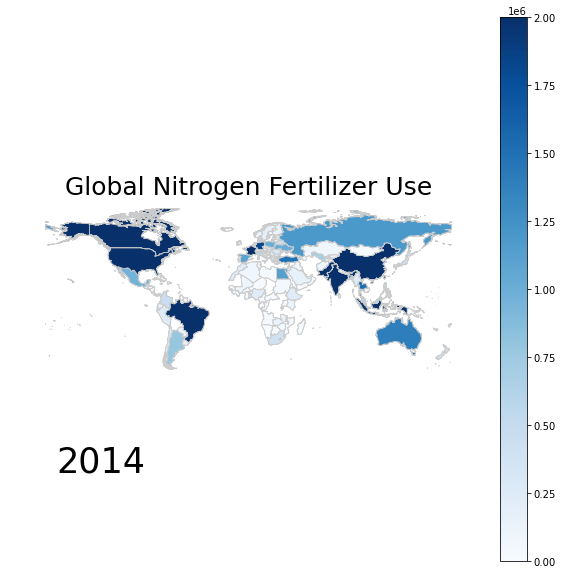

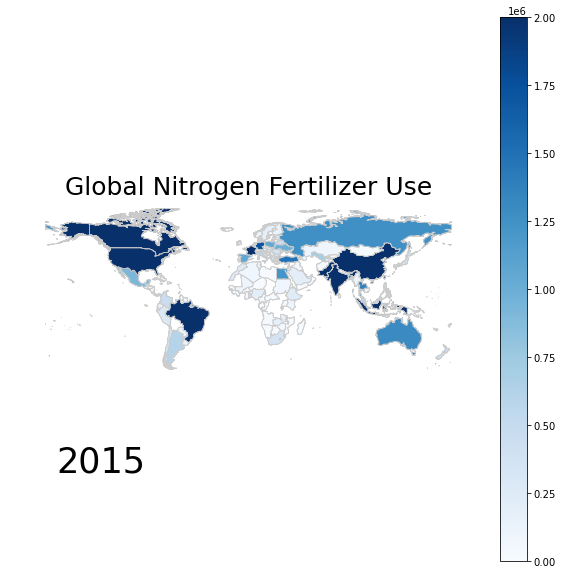

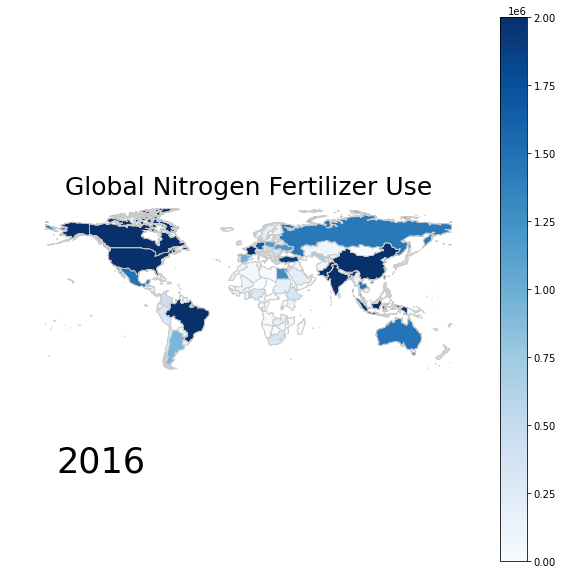

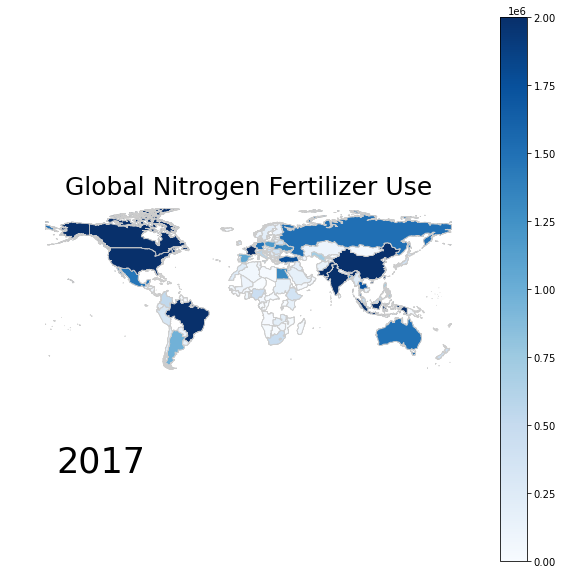

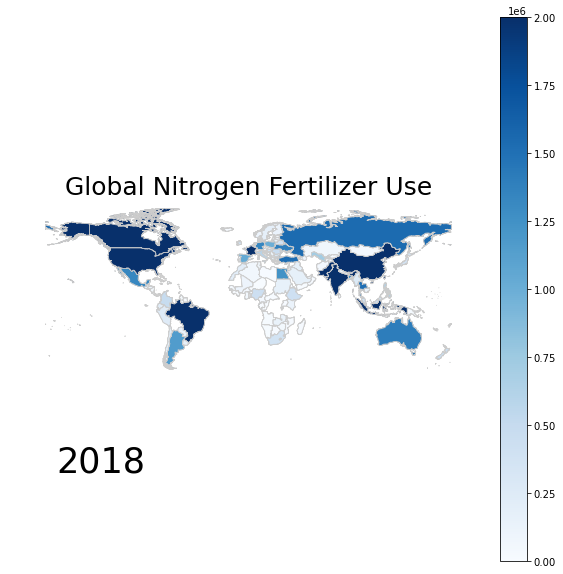

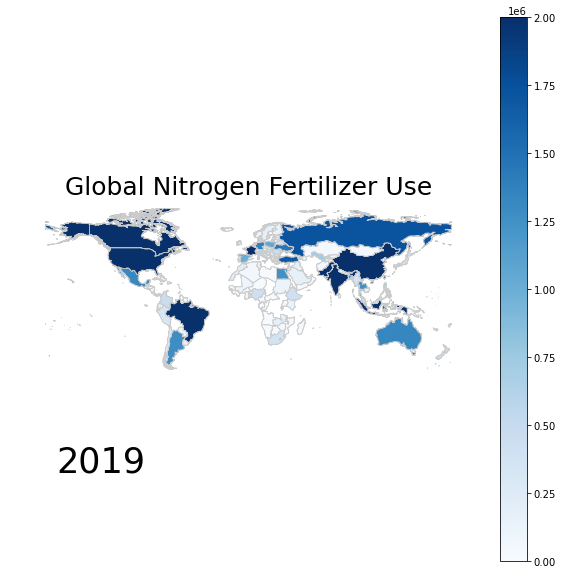

In [33]:
# Loop year year to create image for Nitrogen fertilizer use
for year in year_range:
    df_new = merged.loc[((merged['Year'] == year) & (merged["Item Code"] == 3102))]
    # create map, UDPATE: added plt.Normalize to keep the legend range the same for all maps
    fig = df_new.plot(column='Value', cmap='Blues', figsize=(10,10), linewidth=0.8, edgecolor='0.8', vmin=vmin, vmax=vmax,
legend=True, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    
    # Remove axis
    fig.axis('off')
    
    # Create a title
    fig.set_title('Global Nitrogen Fertilizer Use', \
              fontdict={'fontsize': '25',
                         'fontweight' : '3'})
    # Position year in bottom left
    fig.annotate(year,
            xy=(0.1, .225), xycoords='figure fraction',
            horizontalalignment='left', verticalalignment='top',
            fontsize=35)
    # Save image as jpg for gif creation
    filepath = os.path.join(str(year) + '_fert.jpg')
    chart = fig.get_figure()
    chart.savefig(filepath, dpi=300)

In [34]:
# Convert jpg to png files for each map image
for year in year_range:
    im1 = Image.open(str(year) + '_fert.jpg')
    im1.save(str(year) + '_fert.png')
    os.remove(str(year) + '_fert.jpg')

In [35]:
# Loop through png files and resize for better visualization
png_dir = os.getcwd()
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith(".png"):
        image = Image.open(file_name)
        new_width  = 800
        new_height = 800
        image = image.resize((new_width, new_height), Image.ANTIALIAS)
        image.save(file_name)

In [36]:
# Create Gif and remove each .png file
images = []
for file_name in sorted(os.listdir(png_dir)):
    if file_name.endswith(".png"):
        file_path = os.path.join(png_dir, file_name)
        images.append(imageio.imread(file_path))
        os.remove(file_path)
imageio.mimsave("MapGif_N.gif", images, fps=1)
